In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn as skl
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
import chardet
with open(r'C:\Users\Sagarika\master.csv','rb') as f:
  rawdata = b''.join([f.readline() for _ in range(20)])
  print(chardet.detect(rawdata)['encoding'])

UTF-8-SIG


In [9]:
df=pd.read_csv('master.csv',encoding="UTF-8-SIG")

In [10]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


## Describing our dataset

In [11]:
print("Dataset has", len(df['country'].unique()), 'countries out of 193')
print('Dataset has', len(df['year'].unique()),'years.')
print(min(df['year']), "-",max(df['year']))

Dataset has 101 countries out of 193
Dataset has 32 years.
1985 - 2016


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


In [13]:
df.describe(include=['O']) #Categorical data

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Netherlands,male,25-34 years,Armenia1996,"1,27,85,66,47,108",Generation X
freq,382,13910,4642,12,12,6408


In [14]:
df.describe() #Numerical data

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


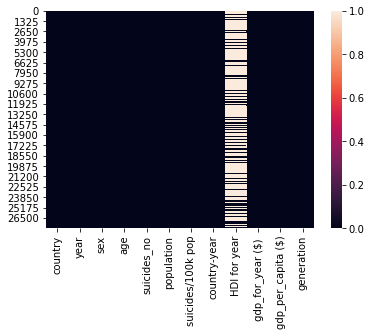

In [15]:
sns.heatmap(df.isnull())

## Data Cleaning

In [16]:
df.drop(['country-year'], axis='columns', inplace=True) #since country and year columns already exist
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,15,66,24,900",796,Boomers


In [17]:
# Create an array with the average HDI of each country
sum = 0
count = 0
cur = df.country[0]
prev = df.country[0]
arr = []
df['HDI for year'].fillna(0.0,inplace=True) # Replace all NaN values sin column 'HDI for year' with 0
df['HDI for year']=df['HDI for year'].astype('float') 
for i in range(len(df.country)):
    cur = df.country[i]
    if(cur != prev):
        avg = sum/count
        arr.append(avg)
        sum = 0
        count = 0
    sum = sum + df['HDI for year'][i]
    count = count + 1
    prev = cur
arr.append(sum/count) 
print(arr)
print(len(arr))

[0.12236363636363645, 0.0868518518518519, 0.2514838709677419, 0.2223221476510068, 0.0, 0.24340000000000034, 0.26623036649214676, 0.07806250000000002, 0.20343478260869577, 0.30652380952380953, 0.2723600000000002, 0.18361904761904765, 0.27764516129032263, 0.22353571428571456, 0.7285000000000003, 0.22416129032258036, 0.24753333333333344, 0.0, 0.27344827586206927, 0.2496774193548382, 0.21622580645161327, 0.23936666666666662, 0.28845801526717546, 0.2471250000000003, 0.396539325842696, 0.28129192546583864, 0.32677272727272755, 0.0, 0.22393548387096768, 0.23466666666666672, 0.3135714285714285, 0.19418181818181834, 0.26655172413793116, 0.28286666666666654, 0.23222727272727256, 0.3052307692307695, 0.2660645161290318, 0.14353548387096768, 0.17429999999999998, 0.17031999999999986, 0.2489419354838712, 0.2712565445026183, 0.28753333333333353, 0.27541935483871005, 0.2692903225806455, 0.24729411764705833, 0.27783870967741975, 0.2564615384615379, 0.0, 0.28603999999999996, 0.21573076923076956, 0.298761

In [18]:
# Replace the zero values of HDI with the average HDI of each country respectively
j=0
cur=df.country[0]
prev=df.country[0]
for i in range(len(df.country)):
    cur=df.country[i]
    if (df['HDI for year'][i]==0.0):
        df['HDI for year'][i]=arr[j]
    if (cur!=prev):
        j=j+1
    prev=cur
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.122364,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.122364,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.122364,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.122364,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.122364,"2,15,66,24,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675000,"63,06,70,77,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675000,"63,06,70,77,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675000,"63,06,70,77,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675000,"63,06,70,77,179",2309,Generation Z


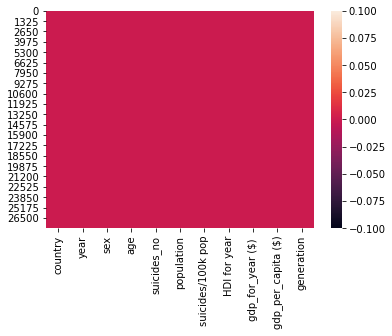

In [19]:
sns.heatmap(df.isnull())

In [20]:
# Checking for outliers
# Plotting box-plot for numeric values and histogram for categorical values

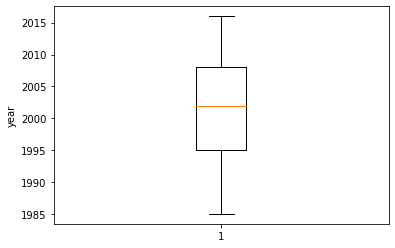

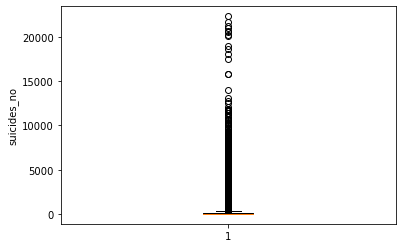

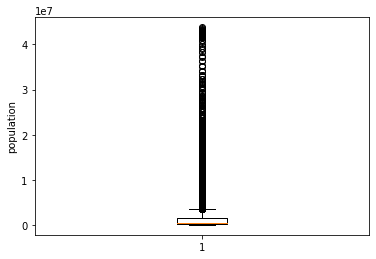

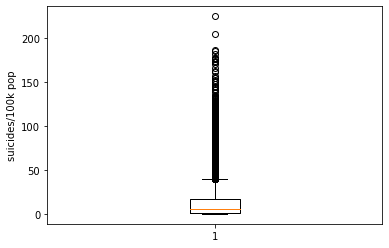

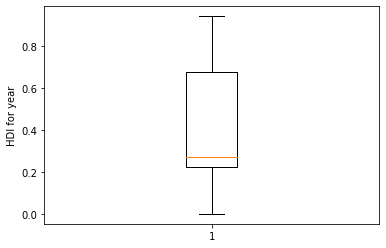

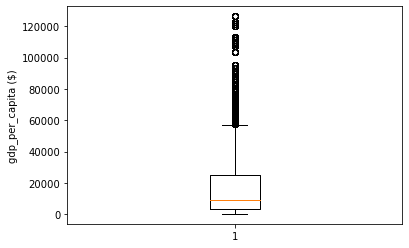

In [21]:
data=df.describe().columns.tolist()
for i in data:
    plt.boxplot(df[i])
    plt.ylabel(i) 
    plt.show()

In [22]:
# no outliers since every value is possible

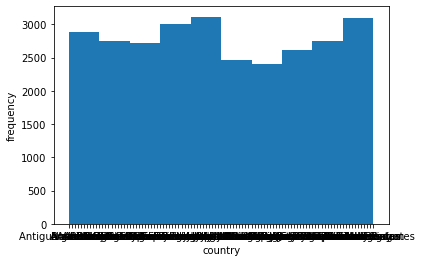

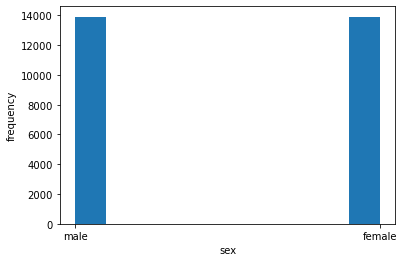

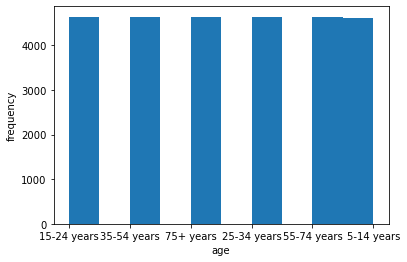

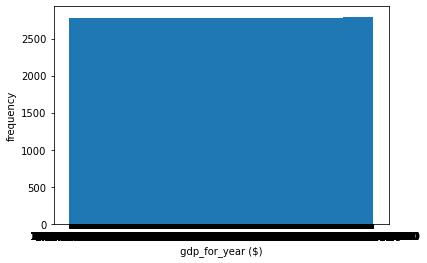

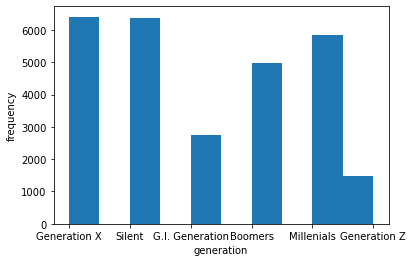

In [23]:
data=df.describe(include=['O']).columns.tolist()
for i in data:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.show()

In [24]:
# no outliers since every value is possible

## Data Visualization

,country,suicides/100k pop
0,Albania,3.502879
1,Antigua and Barbuda,0.552901
2,Argentina,10.469328
3,Armenia,3.275872
4,Aruba,9.503095


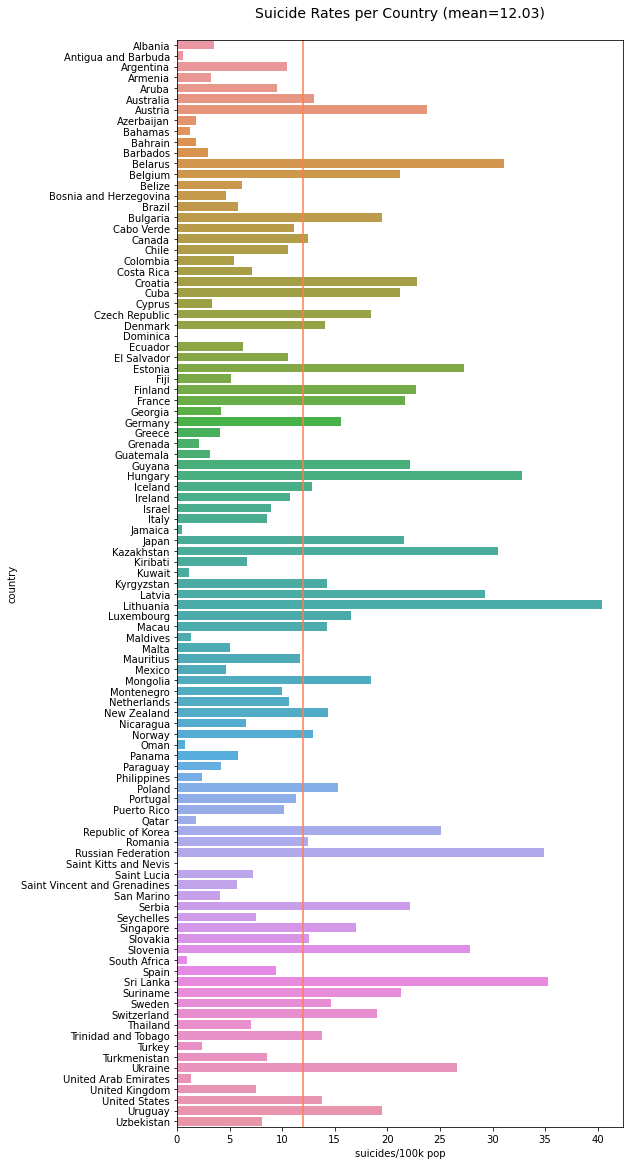

In [25]:
sRate = df['suicides/100k pop'].groupby(df['country']).mean().reset_index()
sMean = sRate['suicides/100k pop'].mean()
plt.figure(figsize=(8,20))
plt.title('Suicide Rates per Country (mean={:.2f})\n'.format(sMean), fontsize=14)
plt.axvline(x=sMean,color='coral')
sns.barplot(data=sRate, y='country',x='suicides/100k pop')
sRate.head()

From the above graph we can infer: 
* the suicides rates are the highest in Lituania and the lowest in Dominica and Saint Kitts and Nevis.
* the mean suicide rate is 12.03

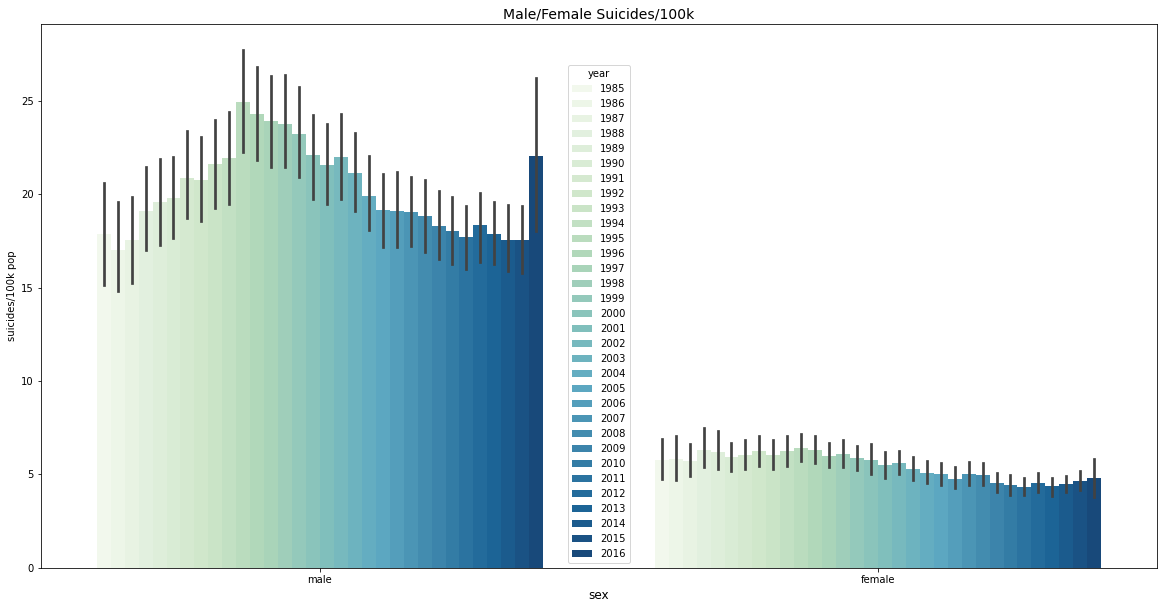

In [26]:
fig = plt.figure(figsize=(20,10))
plt.title('Male/Female Suicides/100k', fontsize=14)
plt.xlabel('age', fontsize=12)
sns.barplot(data=df, x='sex',y='suicides/100k pop', hue='year',palette='GnBu')

From the above graph we can infer:
* Males are more likely to commit suicide than females
* Suicide rate of both males and females was highest in the year 1995

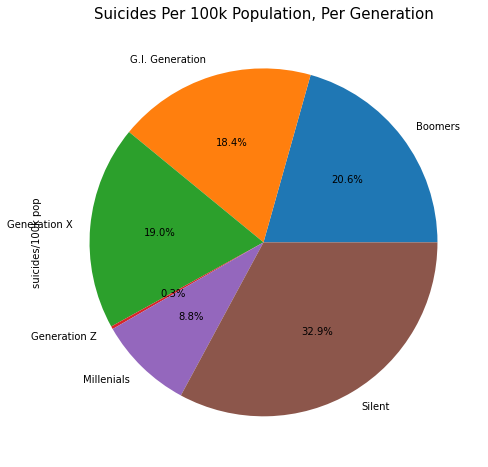

In [27]:
ax=df.groupby(['generation'])['suicides/100k pop'].sum().plot.pie(figsize=(8,8), autopct='%1.1f%%')
plt.title("Suicides Per 100k Population, Per Generation",fontsize=15)
plt.show()

From the above graph we can infer:
* The Silent generation is most likely to commit suicide
* Generatin Z is least likely to commit suicide

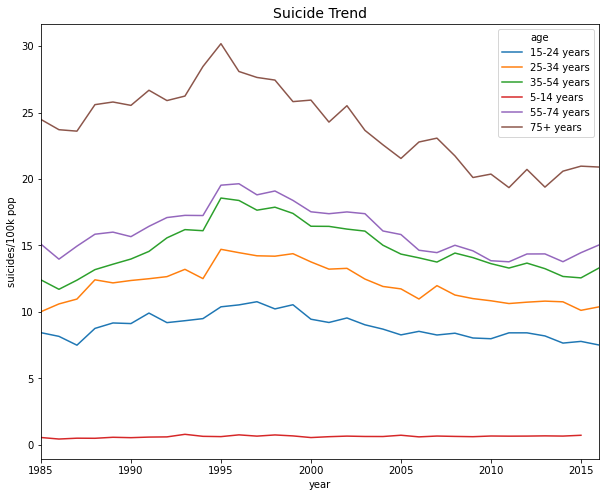

In [28]:
df_sort =  df.sort_values(by='age')  # sort by age
plt.figure(figsize=(10,8))
plt.title('Suicide Trend', fontsize=14)
plt.xlim(1985,2016)
sns.lineplot(data=df_sort,x='year',y='suicides/100k pop',hue='age',ci=None)
plt.show()

From the above graph we can infer:
* Suicide rates was highest around the year 1995
* people in the age group of '75+ years' are most likely to commit suicide

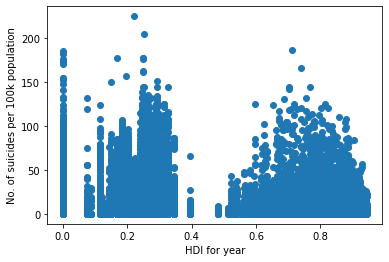

In [29]:
plt.scatter(df['HDI for year'], df['suicides/100k pop'])
plt.xlabel('HDI for year')
plt.ylabel('No. of suicides per 100k population')
plt.show()

From the above graph we can infer:
* The suicide rate decrease slightly as the HDI for year increase

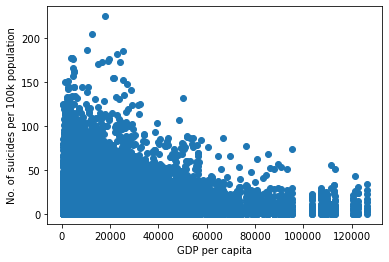

In [30]:
plt.scatter(df['gdp_per_capita ($)'], df['suicides/100k pop'])
plt.xlabel('GDP per capita')
plt.ylabel('No. of suicides per 100k population')
plt.show()

From the above graph we can infer:
* The suicide rate decrease as the GDP per capita increase

## Normalization

In [31]:
df.mean()

year                  2.001258e+03
suicides_no           2.425744e+02
population            1.844794e+06
suicides/100k pop     1.281610e+01
HDI for year          3.892152e-01
gdp_per_capita ($)    1.686646e+04
dtype: float64

In [32]:
df.var()

year                  7.172489e+01
suicides_no           8.136904e+05
population            1.530202e+13
suicides/100k pop     3.595389e+02
HDI for year          7.217473e-02
gdp_per_capita ($)    3.567405e+08
dtype: float64

In [33]:
from sklearn.preprocessing import MinMaxScaler
df_num = df.drop(df.describe(include=['O']), axis=1)
x = df_num.values.astype(float)
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized

,0,1,2,3,4,5
0,0.064516,0.000940,0.007137,0.029826,0.129622,0.004322
1,0.064516,0.000716,0.007025,0.023070,0.129622,0.004322
2,0.064516,0.000627,0.006607,0.021470,0.129622,0.004322
3,0.064516,0.000045,0.000491,0.020403,0.129622,0.004322
4,0.064516,0.000403,0.006256,0.014580,0.129622,0.004322
...,...,...,...,...,...,...
27815,0.935484,0.004790,0.082652,0.013157,0.715042,0.016320
27816,0.935484,0.000403,0.007949,0.011468,0.715042,0.016320
27817,0.935484,0.002686,0.063050,0.009646,0.715042,0.016320
27818,0.935484,0.001970,0.060069,0.007423,0.715042,0.016320


In [34]:
df_normalized.mean().round(decimals=1)

0    0.5
1    0.0
2    0.0
3    0.1
4    0.4
5    0.1
dtype: float64

In [35]:
df_normalized.var().round(decimals=1)

0    0.1
1    0.0
2    0.0
3    0.0
4    0.1
5    0.0
dtype: float64

## Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
df_std = pd.DataFrame(scaled)
df_std

,0,1,2,3,4,5
0,-1.683615,-0.245639,-0.391617,-0.322032,-0.993311,-0.850864
1,-1.683615,-0.251182,-0.392870,-0.402196,-0.993311,-0.850864
2,-1.683615,-0.253400,-0.397548,-0.421182,-0.993311,-0.850864
3,-1.683615,-0.267811,-0.466035,-0.433839,-0.993311,-0.850864
4,-1.683615,-0.258943,-0.401485,-0.502928,-0.993311,-0.850864
...,...,...,...,...,...,...
27815,1.504519,-0.150299,0.454032,-0.519804,1.063786,-0.770757
27816,1.504519,-0.258943,-0.382526,-0.539845,1.063786,-0.770757
27817,1.504519,-0.202404,0.234518,-0.561468,1.063786,-0.770757
27818,1.504519,-0.220141,0.201141,-0.587838,1.063786,-0.770757


In [37]:
df_std.mean().round(decimals=1)

0   -0.0
1    0.0
2   -0.0
3   -0.0
4    0.0
5   -0.0
dtype: float64

In [38]:
df_std.var().round(decimals=1)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
dtype: float64

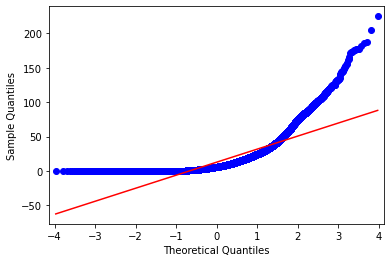

In [39]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df['suicides/100k pop'], line='s')
pyplot.show()

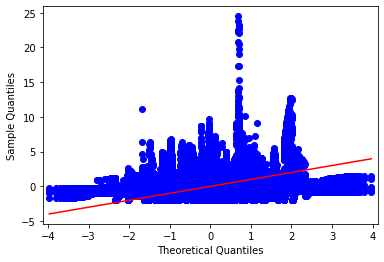

In [40]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df_std, line='s')
pyplot.show()

## Correlation

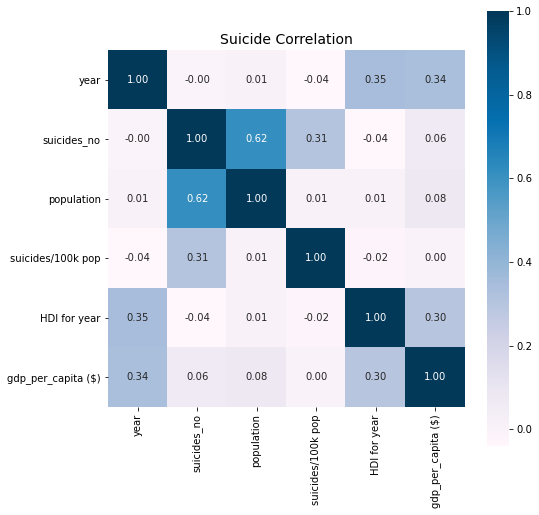

In [41]:
dataCorr = df.corr()
plt.figure(figsize=(8,8))
plt.title('Suicide Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'PuBu')

From the above graph we can infer:
* Correlation between suicides_no and population is positive with a correlation factor of 0.62
* Correlation between suicides/100k pop and HDI for year is negative with a correlation factor of -0.02

## Hypothesis Testing

Looking at the dataset we assume that the Suicide rate in Ukraine is high. We assume that the average suide rate in Ukraine is more than 12.816.

#### Solution:
Null hypothesis: $\mu$ > 12.816  
Alternate hypothesis: $\mu$ <= 12.816

In [42]:
df_ukraine = df.loc[df['country'] == 'Ukraine']
pop_mean = df['suicides/100k pop'].mean()
print('Population mean =',pop_mean)
pop_std = df['suicides/100k pop'].std()
print('Standard deviation of population =',pop_std)
sample = df_ukraine['suicides/100k pop'].sample(200)
sample_mean = sample.mean()
print('Sample mean =',sample_mean)
n = 200

Population mean = 12.816097411933894
Standard deviation of population = 18.96151101450304
Sample mean = 28.034400000000005


In [43]:
import scipy.special as scsp
from scipy.stats import norm
z=(sample_mean-pop_mean)/(pop_std/np.sqrt(n))
print('Z score',z)
p_value=0.5*(1+scsp.erf(z/np.sqrt(2)))
print("\nP-value",p_value)
if(p_value<0.05):
    print("\nReject null hypothesis\n")
else :
    print("\nAccept null hypothesis\n")

Z score 11.350324296349193

P-value 1.0

Accept null hypothesis

